![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Callysto’s Weekly Data Visualization

## Health Data

### Recommended Grade levels: 8-12
<br>

### Instructions
#### “Run” the cells to see the graphs
Click “Cell” and select “Run All”.<br> This will import the data and run all the code, so you can see this week's data visualization. Scroll to the top after you’ve run the cells.<br> 

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

**You don’t need to do any coding to view the visualizations**.
The plots generated in this notebook are interactive. You can hover over and click on elements to see more information. 

Email contact@callysto.ca if you experience issues.

### About this Notebook

Callysto's Weekly Data Visualization is a learning resource that aims to develop data literacy skills. We provide Grades 5-12 teachers and students with a data visualization, like a graph, to interpret. This companion resource walks learners through how the data visualization is created and interpreted by a data scientist. 

The steps of the data analysis process are listed below and applied to each weekly topic.

1. Question - What are we trying to answer? 
2. Gather - Find the data source(s) you will need. 
3. Organize - Arrange the data, so that you can easily explore it. 
4. Explore - Examine the data to look for evidence to answer the question. This includes creating visualizations. 
5. Interpret - Describe what's happening in the data visualization. 
6. Communicate - Explain how the evidence answers the question. 

# Question

How do the health measurements in the supplied dataset compare to those in the classroom? This notebook is interactive in that a classroom element can be added by allowing students to collect their own measurements and compare.

### Goal
Our goal is to investigate an accessible type of data (body measurements) and compare it against at least one other set of the same measurements. 

- How are the datasets similar? 
- How are they different? 
- What could be a cause of the differences?
- Is there anything in the data that's surprising or sticks out?

The data that we're looking at in particular is taken from several thousand American children and adults. For each person, alongside height we have systolic and diastolic blood pressure measurements, as well as [resting heart rate](https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/how-a-healthy-heart-works). All measurements were recorded three times (Why?).

### Blood Pressure

Blood pressure is an [important indicator of cardiovascular health](https://www.heartandstroke.ca/heart-disease/risk-and-prevention/condition-risk-factors/high-blood-pressure). Likely you've had your blood pressure measured anytime you would visit a doctor's office or other medical professional, and the measurement typically consists of two numbers: systolic blood pressure, and diastolic blood pressure. Blood pressure is usually recorded as:

$$
\frac{120}{80} mmHg
$$

where the units are **millimetres of mercury (mmHg)**.

The first number, systolic, is the pressure exerted by the heart on the arteries as it's contracting and forcing blood out of the left ventricle. This number can change quickly and frequently, often as a response to both negative stressors on the body (emotion, illness) or as a natural response to healthy states (exercise, sleep). The **typical healthy systolic blood pressure in adults is ~120 mmHg**, though it's not uncommon to have lower blood pressures in active adults, and children. Higher (resting) values of systolic blood pressure are generally a negative sign.

Diastolic blood pressure is the second value reported, and is less prone to sudden variation than systolic blood pressure. It represents the pressure in the arteries when the heart is between beats. A **typical healthy diastolic blood pressure is ~80 mmHg**, though similar to systolic, it's not unusual to have lower values. As this measurement is more stable, seeing higher values of diastolic blood pressure is of more concern than higher values of systolic.

When *either* resting blood pressure value is above a certain number (>135 for systolic, >85 for diastolic), it indicates the presence of a condition called **hypertension**. Hypertension, or just simply high blood pressure, as it's also commonly referred to, [can put you at risk of several nasty health problems](https://www.heartandstroke.ca/-/media/pdf-files/canada/health-information-catalogue/en-managing-your-blood-pressure.ashx) such as heart attack and stroke. The routine measurement of blood pressure is important to detect hypertension, as health status can change over time. It's also critical to not make a diagnosis on a single measurement, as that value can be abnormally high (or low) on that particular day, and may not truly be of concern.

### Heart Rate

Probably one of the simplest measurements of body function to collect is heart rate. No doubt you've been aware of your heart rate at some point, either by measuring it directly, or by feeling it when it's been elevated. There are [multiple locations on the body that can be used to measure heart rate](https://www.healthline.com/health/how-to-check-heart-rate), but the easiest is the radial artery in the wrist:

![Radial HR measurement](https://s32917.pcdn.co/wp-content/uploads/2020/02/VHFC0134_How_do_I_measure_my_heart_rate_image1.jpeg)

By counting the number of beats that occur in a 15-second time period, and multiplying that number by 4, you can measure your heart rate in **beats per minute (bpm)**.

A typical (resting) heart rate in adults is between 60-72 bpm (up to 100 bpm in children), though extremely fit individuals can have a much lower heart rate. Heart rate can be elevated by the same stressors as blood pressure (exercise, emotional state) and can drop considerably during sleep.

Though blood pressure requires equipment to properly measure, both heart rate and height can be measured in the classroom. As you learn about visualizing this data, think about collecting your own and see how it compares.

# Gather

### Code:
The code below will import the Python programming libraries we need to gather and organize the data to answer our question.

In [1]:
## Import libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

### Data:

We're going to collect the data from three different sources. The links below are to the files themselves, but to save time they've already been downloaded and are accessed in the next step

- [National Health and Nutrition Examination Survey (NHANES) Body Measurement](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&Cycle=2017-2020)
- [National Health and Nutrition Examination Survey (NHANES) Blood Pressure](https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BPXO.XPT)
- [National Health and Nutrition Examination Survey (NHANES) Demographics](https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.XPT)

### Import the data

In [2]:
# Import data
nhanesDataHt = pd.read_sas('data/P_BMX.XPT')[['SEQN','BMXHT']]
nhanesDataBp = pd.read_sas('data/P_BPXO.XPT')[['SEQN', 
                                               'BPXOSY1', 
                                               'BPXOSY2', 
                                               'BPXOSY3', 
                                               'BPXODI1', 
                                               'BPXODI2', 
                                               'BPXODI3', 
                                               'BPXOPLS1', 
                                               'BPXOPLS2', 
                                               'BPXOPLS3']]
nhanesDataDem = pd.read_sas('data/P_DEMO.XPT')[['SEQN', 'RIAGENDR']]

### Comment on the data
We have three datasets from the NHANES, one containing data about height, another containing data about blood pressure and heart rate. We also have a third dataset that has information about the sexes of our participants, so we can use that as well to show differences between males and females. 

The datasets contain far more data than we actually need, so in the same step that we import the data, we've also only selected the columns that we need and discarded the rest. However, the names of the columns aren't very descriptive, so in the next step we can make it easier to handle.

# Organize

Now that we have the data in our notebook, we can make some changes to it to make our analysis easier. The first step we're going to do is to rename our columns, as the coding given to them by the researchers that originally collected the data isn't very helpful. Thankfully, along with the data, the researchers also published a 'data dictionary' that helps us convert the codes into something more helpful.

In [3]:
# Data cleaning
anthNames = {
    'SEQN': 'ID', 
    'BMXHT': 'Height (cm)'
}
bpNames = { 
    'SEQN' : 'ID',
    'BPXOSY1' : 'Systolic BP (1st reading)',
    'BPXOSY2' : 'Systolic BP (2nd reading)',
    'BPXOSY3' : 'Systolic BP (3rd reading)',
    'BPXODI1' : 'Diastolic BP (1st reading)',
    'BPXODI2' : 'Diastolic BP (2nd reading)',
    'BPXODI3' : 'Diastolic BP (3rd reading)',
    'BPXOPLS1' : 'Heart rate (1st reading)',
    'BPXOPLS2' : 'Heart rate (2nd reading)',
    'BPXOPLS3' : 'Heart rate (3rd reading)'
}
demNames = {
    'SEQN': 'ID',
    'RIAGENDR': 'Sex'
}
nhanesDataHt.rename(anthNames, axis=1, inplace=True)
nhanesDataBp.rename(bpNames, axis=1, inplace=True)
nhanesDataDem.rename(demNames, axis=1, inplace=True)

In [4]:
# Display the data
print('Height data')
display(nhanesDataHt)
print('Blood pressure and heart rate data')
display(nhanesDataBp)
print('Demographic data')
display(nhanesDataDem)

Height data


ID  Height (cm)
0      109263.0          NaN
1      109264.0        154.7
2      109265.0         89.3
3      109266.0        160.2
4      109269.0          NaN
...         ...          ...
14295  124818.0        168.7
14296  124819.0         93.7
14297  124820.0        123.3
14298  124821.0        176.4
14299  124822.0        167.5

[14300 rows x 2 columns]

Blood pressure and heart rate data


ID  Systolic BP (1st reading)  Systolic BP (2nd reading)  \
0      109264.0                      109.0                      109.0   
1      109266.0                       99.0                       99.0   
2      109270.0                      123.0                      124.0   
3      109271.0                      102.0                      108.0   
4      109273.0                      116.0                      110.0   
...         ...                        ...                        ...   
11651  124815.0                      141.0                      138.0   
11652  124817.0                      111.0                      112.0   
11653  124818.0                      106.0                      108.0   
11654  124821.0                      121.0                      122.0   
11655  124822.0                      122.0                      121.0   

       Systolic BP (3rd reading)  Diastolic BP (1st reading)  \
0                          106.0                        67.0   
1                           99.0                        56.0   
2                          127.0                        73.0   
3                          111.0                        65.0   
4                          115.0                        68.0   
...                          ...                         ...   
11651                      141.0                        87.0   
11652                      113.0                        69.0   
11653                       95.0                        67.0   
11654                      129.0                        66.0   
11655                      123.0                        55.0   

       Diastolic BP (2nd reading)  Diastolic BP (3rd reading)  \
0                            68.0                        66.0   
1                            55.0                        52.0   
2                            77.0                        70.0   
3                            68.0                        68.0   
4                            66.0                        68.0   
...                           ...                         ...   
11651                        86.0                        87.0   
11652                        67.0                        66.0   
11653                        65.0                        70.0   
11654                        67.0                        67.0   
11655                        56.0                        58.0   

       Heart rate (1st reading)  Heart rate (2nd reading)  \
0                          94.0                      95.0   
1                          68.0                      66.0   
2                          95.0                      98.0   
3                          73.0                      71.0   
4                          71.0                      70.0   
...                         ...                       ...   
11651                      56.0                      56.0   
11652                      70.0                      70.0   
11653                     120.0                     119.0   
11654                      60.0                      61.0   
11655                      56.0                      53.0   

       Heart rate (3rd reading)  
0                          91.0  
1                          66.0  
2                          93.0  
3                          70.0  
4                          70.0  
...                         ...  
11651                      58.0  
11652                      72.0  
11653                     118.0  
11654                      61.0  
11655                      56.0  

[11656 rows x 10 columns]

Demographic data


ID  Sex
0      109263.0  1.0
1      109264.0  2.0
2      109265.0  1.0
3      109266.0  2.0
4      109267.0  2.0
...         ...  ...
15555  124818.0  1.0
15556  124819.0  1.0
15557  124820.0  2.0
15558  124821.0  1.0
15559  124822.0  1.0

[15560 rows x 2 columns]

Hey wait a second, what does a sex of '1.0' mean? Or '2.0'? 

Another quirk of working with data is that computers much prefer numbers to words. Therefore, a lot of the time features that would normally have a text (or 'categorical') response are initially recorded as numbers. We're not computers though, so we can switch the values to something that makes a little more sense to us.

In [5]:
# Replace sex coding
nhanesDataDem.replace({1.0: 'Male', 2.0: 'Female'}, inplace=True)
display(nhanesDataDem)

ID     Sex
0      109263.0    Male
1      109264.0  Female
2      109265.0    Male
3      109266.0  Female
4      109267.0  Female
...         ...     ...
15555  124818.0    Male
15556  124819.0    Male
15557  124820.0  Female
15558  124821.0    Male
15559  124822.0    Male

[15560 rows x 2 columns]

### Comment on the data

We have our datasets prepared, and with column names that are descriptive of the data they contain. There's one final step that we need to do though: add the information about sex to the other two datasets. This will allow us to look at the differences between males and females.

Joining datasets is extremely common in data science, as it's a necessary step anytime you want to compare and contrast two datasets that came from different locations or are in two files.

In [6]:
# Combine datasets
nhanesDataHt = pd.merge(nhanesDataHt, 
                        nhanesDataDem, 
                        how='inner', 
                        on='ID')
nhanesDataBp = pd.merge(nhanesDataBp, 
                        nhanesDataDem, 
                        how='inner', 
                        on='ID')
display(nhanesDataHt)
display(nhanesDataBp)

ID  Height (cm)     Sex
0      109263.0          NaN    Male
1      109264.0        154.7  Female
2      109265.0         89.3    Male
3      109266.0        160.2  Female
4      109269.0          NaN    Male
...         ...          ...     ...
14295  124818.0        168.7    Male
14296  124819.0         93.7    Male
14297  124820.0        123.3  Female
14298  124821.0        176.4    Male
14299  124822.0        167.5    Male

[14300 rows x 3 columns]

ID  Systolic BP (1st reading)  Systolic BP (2nd reading)  \
0      109264.0                      109.0                      109.0   
1      109266.0                       99.0                       99.0   
2      109270.0                      123.0                      124.0   
3      109271.0                      102.0                      108.0   
4      109273.0                      116.0                      110.0   
...         ...                        ...                        ...   
11651  124815.0                      141.0                      138.0   
11652  124817.0                      111.0                      112.0   
11653  124818.0                      106.0                      108.0   
11654  124821.0                      121.0                      122.0   
11655  124822.0                      122.0                      121.0   

       Systolic BP (3rd reading)  Diastolic BP (1st reading)  \
0                          106.0                        67.0   
1                           99.0                        56.0   
2                          127.0                        73.0   
3                          111.0                        65.0   
4                          115.0                        68.0   
...                          ...                         ...   
11651                      141.0                        87.0   
11652                      113.0                        69.0   
11653                       95.0                        67.0   
11654                      129.0                        66.0   
11655                      123.0                        55.0   

       Diastolic BP (2nd reading)  Diastolic BP (3rd reading)  \
0                            68.0                        66.0   
1                            55.0                        52.0   
2                            77.0                        70.0   
3                            68.0                        68.0   
4                            66.0                        68.0   
...                           ...                         ...   
11651                        86.0                        87.0   
11652                        67.0                        66.0   
11653                        65.0                        70.0   
11654                        67.0                        67.0   
11655                        56.0                        58.0   

       Heart rate (1st reading)  Heart rate (2nd reading)  \
0                          94.0                      95.0   
1                          68.0                      66.0   
2                          95.0                      98.0   
3                          73.0                      71.0   
4                          71.0                      70.0   
...                         ...                       ...   
11651                      56.0                      56.0   
11652                      70.0                      70.0   
11653                     120.0                     119.0   
11654                      60.0                      61.0   
11655                      56.0                      53.0   

       Heart rate (3rd reading)     Sex  
0                          91.0  Female  
1                          66.0  Female  
2                          93.0  Female  
3                          70.0    Male  
4                          70.0    Male  
...                         ...     ...  
11651                      58.0    Male  
11652                      72.0  Female  
11653                     118.0    Male  
11654                      61.0    Male  
11655                      56.0    Male  

[11656 rows x 11 columns]

Now it should be more clear what exactly the data represents. We can also see that for the first dataset of heights, we have 14,300 observations, whereas the second dataset of blood pressures and heart rates is a little less at 11,656. 

In the height dataset above, we can see that some of the data have values that aren't numbers, and are instead "NaN". This is not uncommon in data science; data can be missing for a variety of reasons, such as equipment malfunction, errors in entry, or it simply never existed to begin with. A value of NaN (or sometimes 'NA', 'N/A', or 'null') indicates acknowledgement that the data is missing, rather than leaving it blank or replacing it with a value of zero, which could cause confusion or throw off any calculations.

For our purposes here, missing values are not a big problem, as our plotting functions will just ignore them. However, as you learn more about data science and data cleaning, handling missing data becomes an incredibly important task, especially with more advanced statistics. For today we can consider ourselves lucky that we can leave the data as is.

As you may have also noticed, for the blood pressure and heart rate measurements, we have multiple recordings. Earlier we had talked about the reasons as to why that's good practice for medical data, but it might also make for an interesting visualization to compare the individual measurements to their average. In order to do that, we have to create a new column in our dataset that represents the mean of the three measurements for both blood pressure and heart rate.

In [7]:
# Create mean columns
nhanesDataBp['Average Systolic BP'] = round(nhanesDataBp[['Systolic BP (1st reading)', 'Systolic BP (2nd reading)', 'Systolic BP (3rd reading)']].mean(axis=1),1)
nhanesDataBp['Average Diastolic BP'] = round(nhanesDataBp[['Diastolic BP (1st reading)', 'Diastolic BP (2nd reading)', 'Diastolic BP (3rd reading)']].mean(axis=1),1)
nhanesDataBp['Average Heart Rate'] = round(nhanesDataBp[['Heart rate (1st reading)', 'Heart rate (2nd reading)', 'Heart rate (3rd reading)']].mean(axis=1),1)
display(nhanesDataBp)

ID  Systolic BP (1st reading)  Systolic BP (2nd reading)  \
0      109264.0                      109.0                      109.0   
1      109266.0                       99.0                       99.0   
2      109270.0                      123.0                      124.0   
3      109271.0                      102.0                      108.0   
4      109273.0                      116.0                      110.0   
...         ...                        ...                        ...   
11651  124815.0                      141.0                      138.0   
11652  124817.0                      111.0                      112.0   
11653  124818.0                      106.0                      108.0   
11654  124821.0                      121.0                      122.0   
11655  124822.0                      122.0                      121.0   

       Systolic BP (3rd reading)  Diastolic BP (1st reading)  \
0                          106.0                        67.0   
1                           99.0                        56.0   
2                          127.0                        73.0   
3                          111.0                        65.0   
4                          115.0                        68.0   
...                          ...                         ...   
11651                      141.0                        87.0   
11652                      113.0                        69.0   
11653                       95.0                        67.0   
11654                      129.0                        66.0   
11655                      123.0                        55.0   

       Diastolic BP (2nd reading)  Diastolic BP (3rd reading)  \
0                            68.0                        66.0   
1                            55.0                        52.0   
2                            77.0                        70.0   
3                            68.0                        68.0   
4                            66.0                        68.0   
...                           ...                         ...   
11651                        86.0                        87.0   
11652                        67.0                        66.0   
11653                        65.0                        70.0   
11654                        67.0                        67.0   
11655                        56.0                        58.0   

       Heart rate (1st reading)  Heart rate (2nd reading)  \
0                          94.0                      95.0   
1                          68.0                      66.0   
2                          95.0                      98.0   
3                          73.0                      71.0   
4                          71.0                      70.0   
...                         ...                       ...   
11651                      56.0                      56.0   
11652                      70.0                      70.0   
11653                     120.0                     119.0   
11654                      60.0                      61.0   
11655                      56.0                      53.0   

       Heart rate (3rd reading)     Sex  Average Systolic BP  \
0                          91.0  Female                108.0   
1                          66.0  Female                 99.0   
2                          93.0  Female                124.7   
3                          70.0    Male                107.0   
4                          70.0    Male                113.7   
...                         ...     ...                  ...   
11651                      58.0    Male                140.0   
11652                      72.0  Female                112.0   
11653                     118.0    Male                103.0   
11654                      61.0    Male                124.0   
11655                      56.0    Male                122.0   

       Average Diastolic BP  Average Heart Rate  
0                      67.0       

# Explore

The code below will be used to help us look for evidence to answer our question. We'll start by plotting our data, which is always a good first step when you're analyzing data for the first time, as it can reveal patterns or anomalies.

Another important aspect of science is using your background knowledge to put your data in context. The health data we're looking at in this notebook is commonly collected by health professionals of all sorts, and much has been written about their role in health. We can use that information to give more meaning to our data, by either comparing it to the population averages, or to specified cutoffs for healthy values.

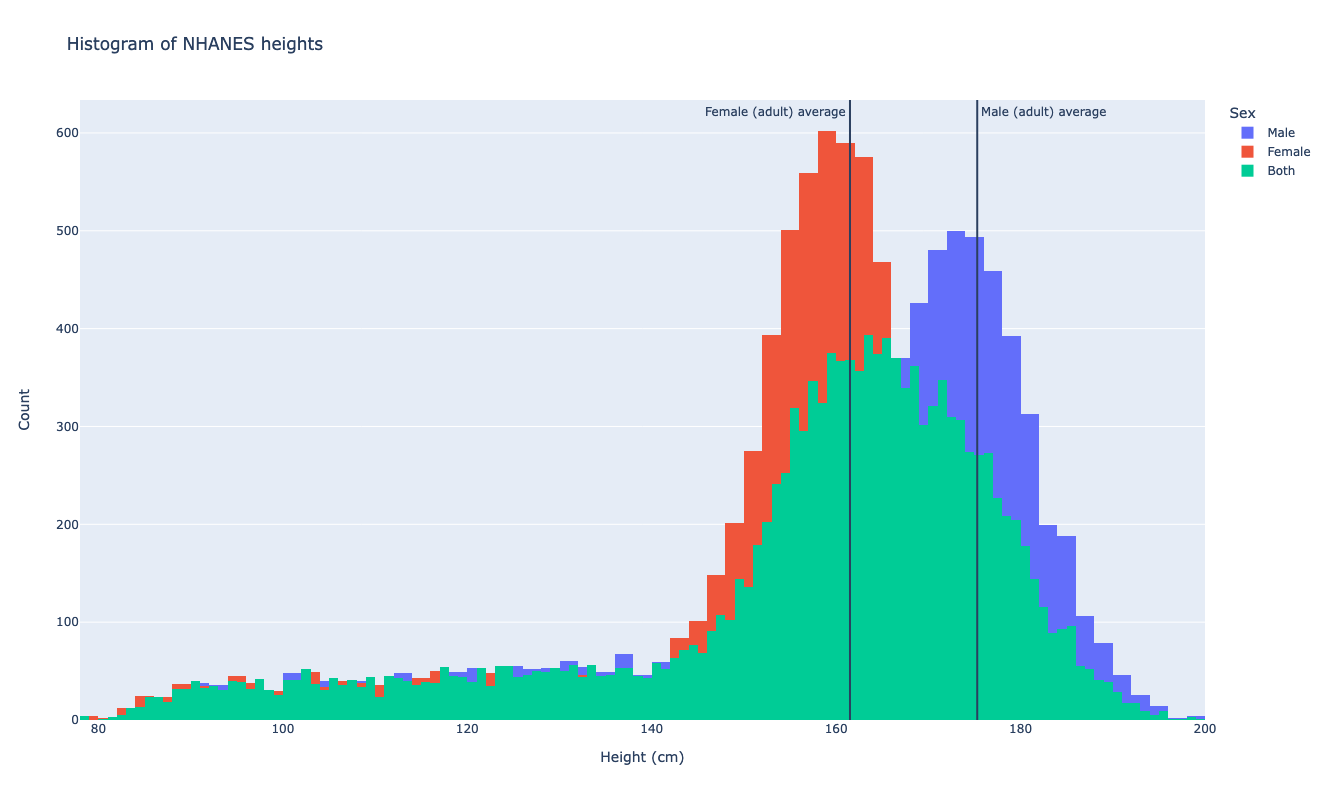

In [36]:
# Height data
fig = go.Figure()
fig.add_trace(go.Histogram(x=nhanesDataHt[nhanesDataHt['Sex']=='Male']['Height (cm)'], name='Male'))
fig.add_trace(go.Histogram(x=nhanesDataHt[nhanesDataHt['Sex']=='Female']['Height (cm)'], name='Female'))
fig.add_trace(go.Histogram(x=nhanesDataHt['Height (cm)'], name='Both'))
fig.add_vline(175.3, annotation_text='Male (adult) average', annotation_position='right top')
fig.add_vline(161.5, annotation_text='Female (adult) average', annotation_position='left top')
fig.update_layout(barmode='overlay',
                 title='Histogram of NHANES heights',
                 legend=dict(title='Sex'),
                 height=800)
fig.update_xaxes(title_text='Height (cm)')
fig.update_yaxes(title_text='Count')
fig.show()

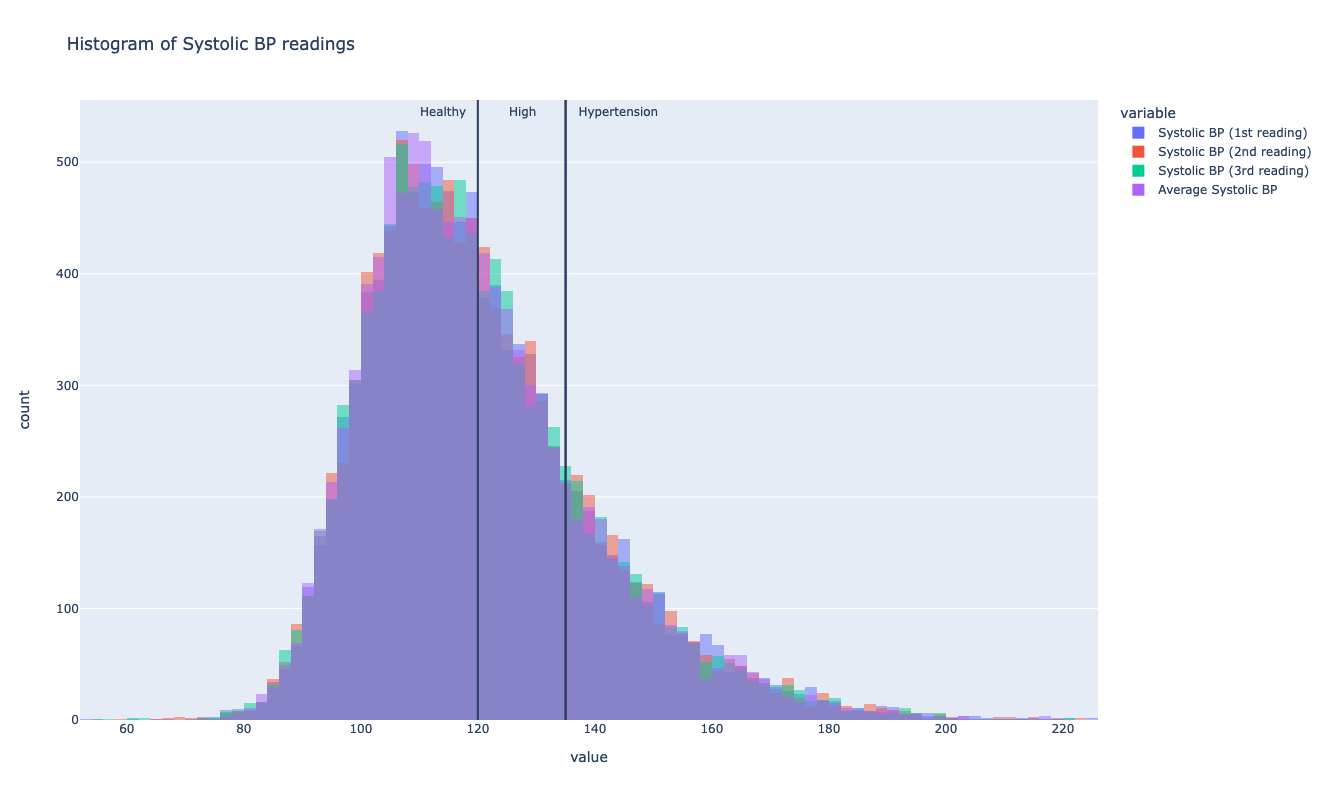

In [9]:
# Blood pressure data
fig = px.histogram(nhanesDataBp,
                   x=['Systolic BP (1st reading)', 'Systolic BP (2nd reading)', 'Systolic BP (3rd reading)', 'Average Systolic BP'],
                   title='Histogram of Systolic BP readings',
                   barmode='overlay',
                   nbins=100,
                   height=800
                   )
fig.add_vline(120, annotation_text='Healthy  ', annotation_position='top left')
fig.add_vline(135, annotation_text='High      ', annotation_position='top left')
fig.add_vline(135, annotation_text='  Hypertension', annotation_position='top right')

fig.show()

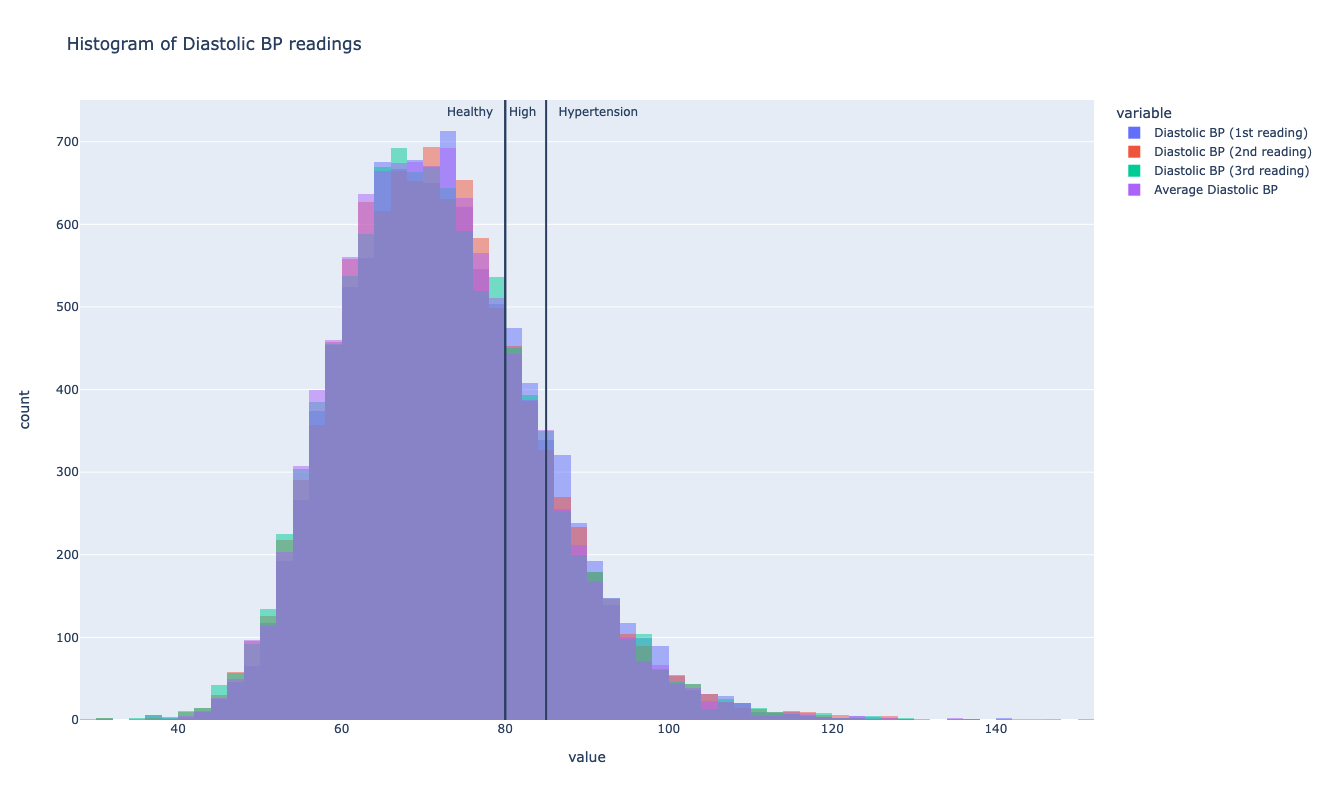

In [10]:
# Blood pressure data
fig = px.histogram(nhanesDataBp,
                   x=['Diastolic BP (1st reading)', 'Diastolic BP (2nd reading)', 'Diastolic BP (3rd reading)', 'Average Diastolic BP'],
                   title='Histogram of Diastolic BP readings',
                   barmode='overlay',
                   nbins=100,
                   height=800
                   )
fig.add_vline(80, annotation_text='Healthy  ', annotation_position='top left')
fig.add_vline(80, annotation_text='High', annotation_position='top right')
fig.add_vline(85, annotation_text='  Hypertension', annotation_position='top right')

fig.show()

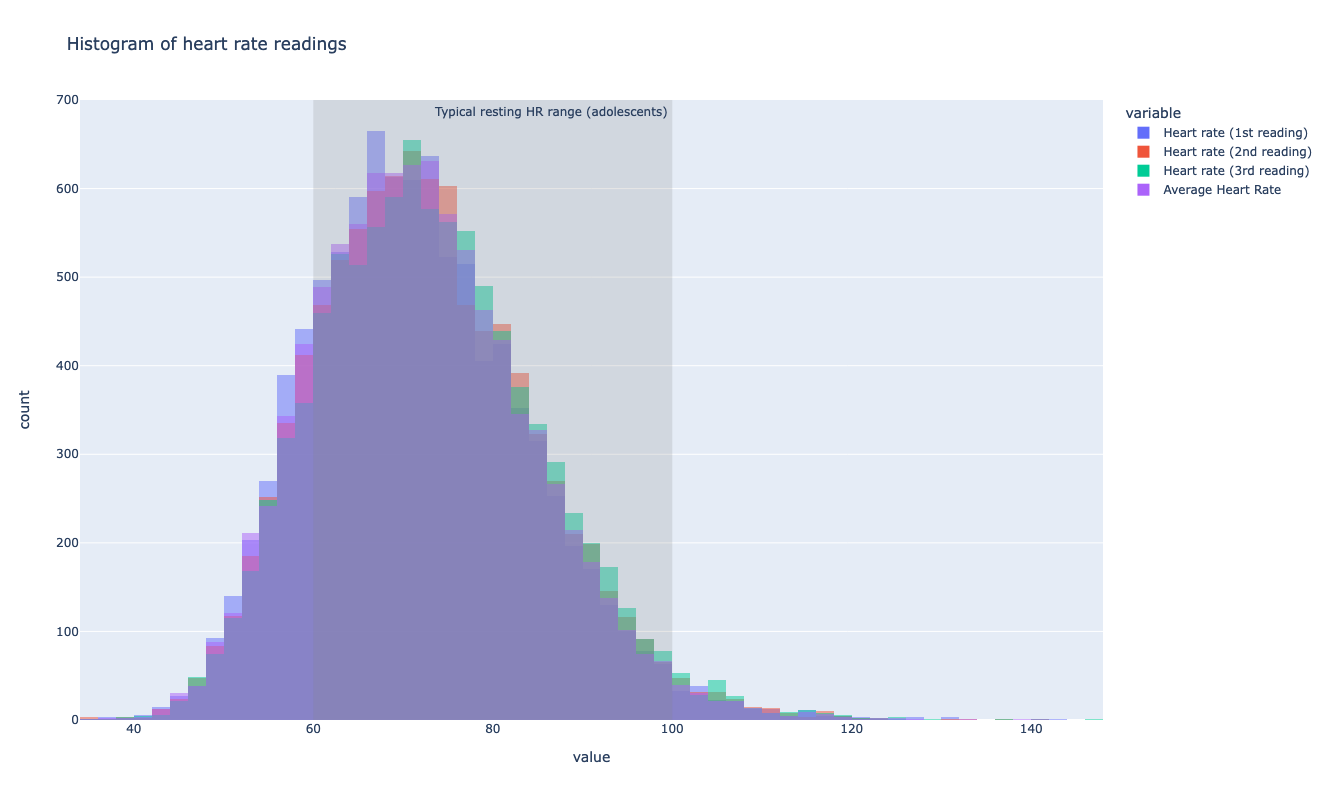

In [11]:
# Heart rate data
fig = px.histogram(nhanesDataBp,
                   x=['Heart rate (1st reading)', 'Heart rate (2nd reading)', 'Heart rate (3rd reading)', 'Average Heart Rate'],
                   title='Histogram of heart rate readings',
                   barmode='overlay',
                   nbins=100,
                   height=800
                   )
fig.add_vrect(x0=60, x1=100,
              annotation_text="Typical resting HR range (adolescents)", 
              annotation_position="top right",
              fillcolor="grey", 
              opacity=0.2, 
              line_width=0)

fig.show()

# Interpret

As we can see in the plots above, there's a generally "normal" distribution to the blood pressure and heart rate data. The vast majority of subjects tend to have measurements that cluster around the mean, with counts dropping off quickly as you get farther away from the center in either direction. There are significant outliers in both directions, but that's an inevitability in any biological dataset.

However, height doesn't follow the same pattern. Why might that be?

#### Height
- How do your measured values compare to the data? Why would there be any difference? 
- Why is neither the male nor female average height located at the highest point of the histogram?

#### Blood Pressure
- Is there a noticeable difference between subsequent measurements of blood pressure (you can turn them on and off by clicking on the legend)? 
- Why might that exist (or not exist)?
- Given the shape of the histogram, would you say most participants in this dataset have a healthy blood pressure? How many do not?

#### Heart Rate
- How does your measured heart rate compare to the data? Can you think of any reason why they might not fall in the center of the plot?
- Perform a quick exercise for 30 seconds or so, like jumping jacks or pushups. How does that change your heart rate? Is it still in the normal range?
- Why would subsequent measurements of heart rate differ? You can investigate this by showing and hiding the different variables by clicking on the legend

## Try it yourself!

Enter your heart rate in the code cell below and re-run the cell to see how your resting and elevated heart rates compare to the data:

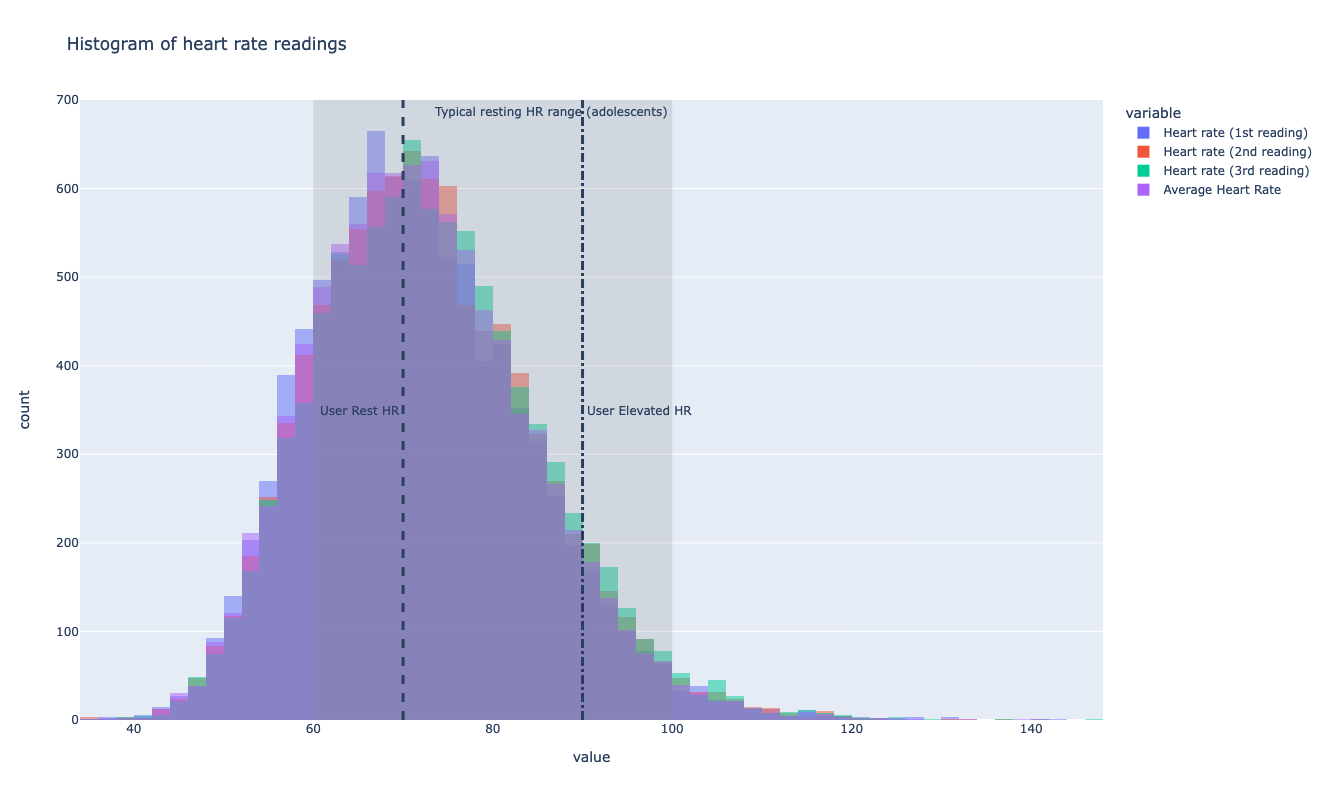

In [12]:
# Enter heart rate below (resting and elevated):

userRestHR = 70
userElevHR = 90

# Code for plotting
fig = px.histogram(nhanesDataBp,
                   x=['Heart rate (1st reading)', 'Heart rate (2nd reading)', 'Heart rate (3rd reading)', 'Average Heart Rate'],
                   title='Histogram of heart rate readings',
                   barmode='overlay',
                   nbins=100,
                   height=800
                   )
fig.add_vrect(x0=60, x1=100,
              annotation_text="Typical resting HR range (adolescents)", 
              annotation_position="top right",
              fillcolor="grey", 
              opacity=0.2, 
              line_width=0)
fig.add_vline(userRestHR, annotation_text='User Rest HR', 
              annotation_position='left',
              line_dash='dash',
              line_width=3)
fig.add_vline(userElevHR, annotation_text='User Elevated HR', 
              annotation_position='right',
              line_dash='dashdot',
              line_width=3)

fig.show()

And we can do the same with your height:

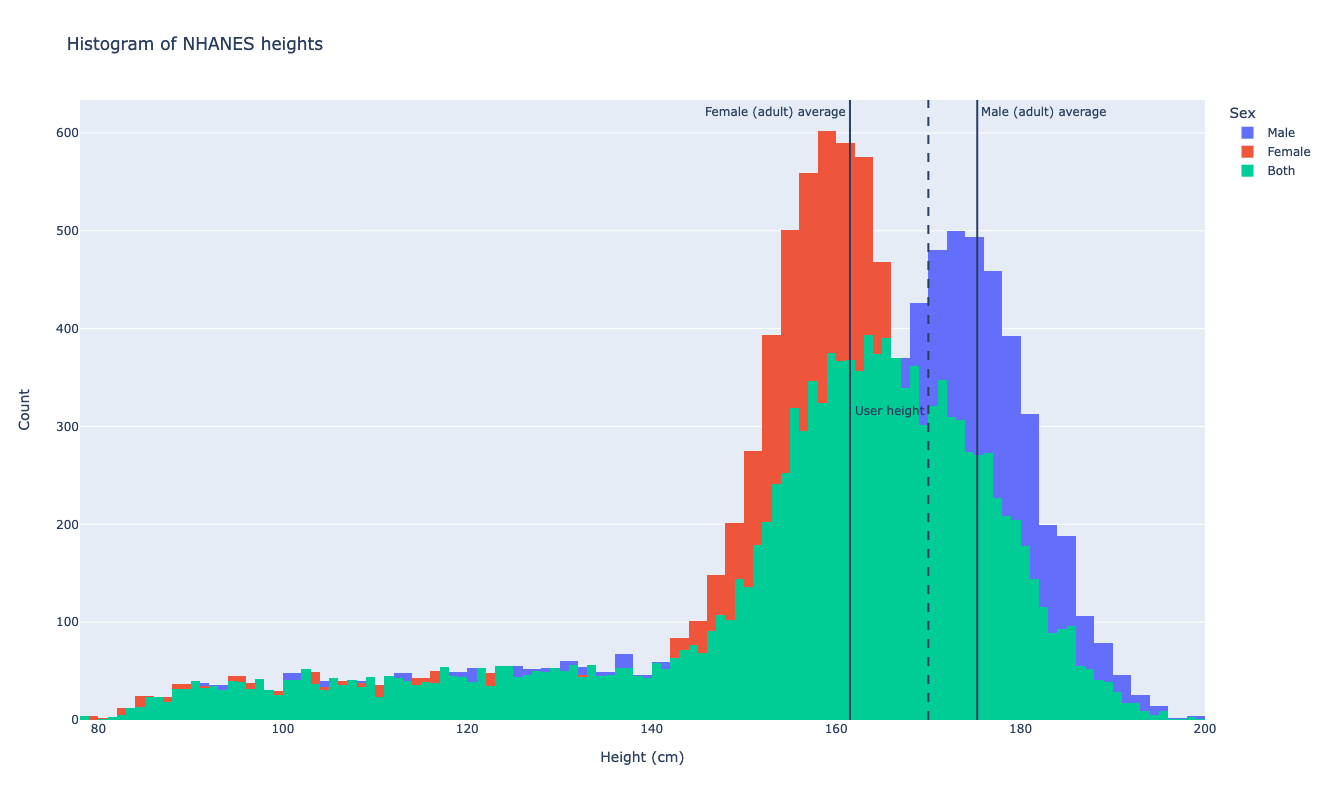

In [39]:
# Enter height below:

userHt = 170

# Code for plotting
fig = go.Figure()
fig.add_trace(go.Histogram(x=nhanesDataHt[nhanesDataHt['Sex']=='Male']['Height (cm)'], name='Male'))
fig.add_trace(go.Histogram(x=nhanesDataHt[nhanesDataHt['Sex']=='Female']['Height (cm)'], name='Female'))
fig.add_trace(go.Histogram(x=nhanesDataHt['Height (cm)'], name='Both'))
fig.add_vline(175.3, annotation_text='Male (adult) average', annotation_position='right top')
fig.add_vline(161.5, annotation_text='Female (adult) average', annotation_position='left top')
fig.add_vline(userHt, annotation_text='User height', line_dash='dash', annotation_position='left')
fig.update_layout(barmode='overlay',
                 title='Histogram of NHANES heights',
                 legend=dict(title='Sex'),
                 height=800)
fig.update_xaxes(title_text='Height (cm)')
fig.update_yaxes(title_text='Count')
fig.show()

# Communicate
Below are some writing prompts to help you reflect on the new information that is presented from the data. When we look at the evidence, think about what you perceive about the information. Is this perception based on what the evidence shows? If others were to view it, what perceptions might they have?

- I used to think __but now I know__.
- I wish I knew more about __.
- This visualization reminds me of __.
- I really like __.


[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)